<a href="https://colab.research.google.com/github/zedeme/Students-Classifier/blob/main/g-Students_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("/content/sample_data/Placement_Data_Full_Class.csv")

In [4]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### **Entendiendo el dataframe**
Vamos a limpiar, analizar y procesar los datos contestando preguntas que posteriormente pueden ayudarnos en plantear una hipostesis para asi comprobarla con nuestro nuestro modelo.


###### ***Pregunta 1: ¿Que factor hace que los estudiantes pasen?***

In [5]:
label = LabelEncoder()
df["status"] = label.fit_transform(df["status"])

In [6]:
df["salary"] = df["salary"].fillna(value=df["salary"].mean())

In [7]:
df_g = pd.get_dummies(df)

In [8]:
sns.set(rc={"figure.figsize": (15, 9)})

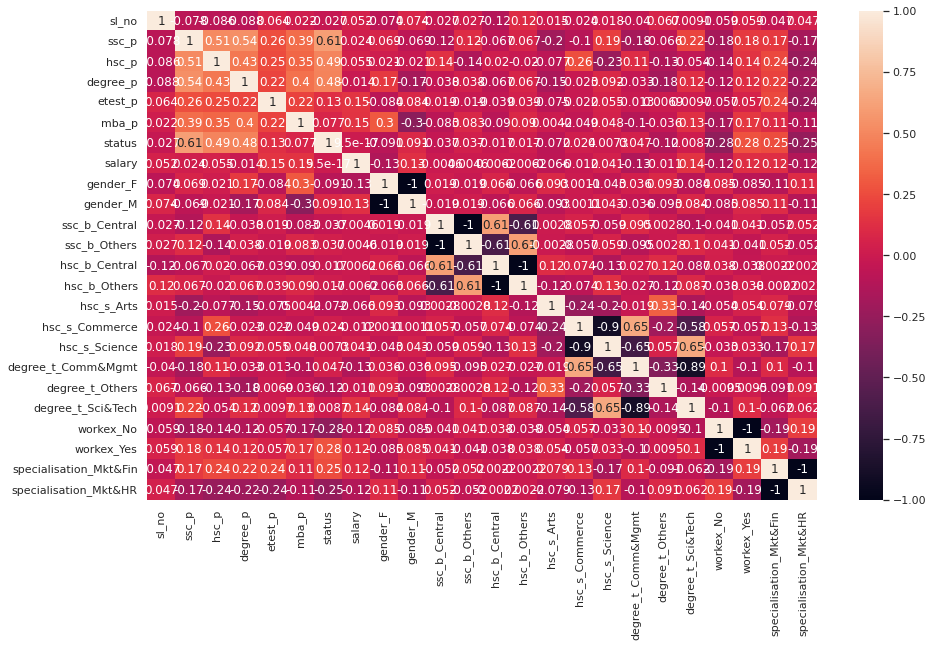

In [9]:
sns.heatmap(df_g.corr(), annot=True)

In [10]:
df_s = pd.pivot_table(df.drop(columns="ssc_p"), index=round(df["ssc_p"]), aggfunc="mean")

In [11]:
df_s = df_s.reset_index()

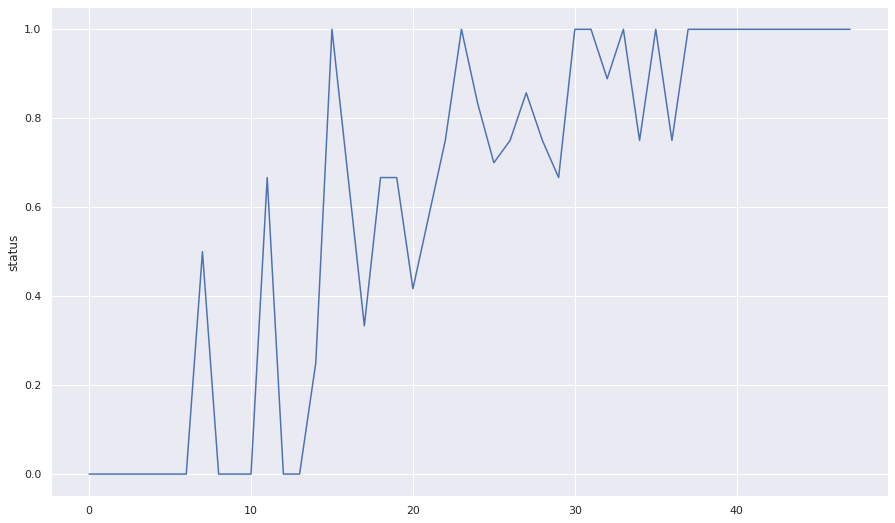

In [12]:
sns.lineplot(x = df_s.index, y = df_s["status"])

***Respuesta: la columna ssc_p parece tener una fuerte correlacion con la entrada o no de los estudiantes, esa columna representa el Secondary Education percentage.***

---

###### ***Pregunta 2: ¿Que certificado es mas buscado?***

In [19]:
df_c = pd.pivot_table(df, index="degree_t")

In [20]:
df_c = df_c.reset_index()

In [18]:
label = LabelEncoder()
df["workex"] = label.fit_transform(df["workex"])

In [21]:
df_c

,degree_t,degree_p,etest_p,hsc_p,mba_p,salary,sl_no,ssc_p,status,workex
0,Comm&Mgmt,66.203103,71.985241,67.185379,61.865379,281601.258155,106.275862,65.955586,0.703448,0.310345
1,Others,60.666364,72.494545,60.181818,61.374545,284902.948403,125.818182,64.227273,0.454545,0.363636
2,Sci&Tech,67.844237,72.310508,65.385593,63.461186,306691.479615,108.915254,71.189322,0.694915,0.423729


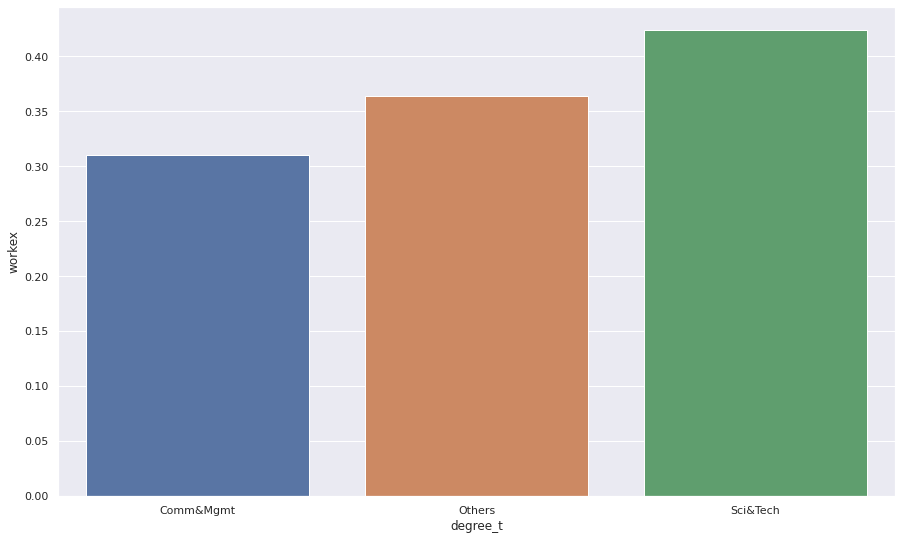

In [22]:
sns.barplot(x=df_c["degree_t"], y=df_c["workex"])

***Respuesta: el certificado Sci&Tech son los que suelen presentar mayor experiencia laboral.***

---

### **Classification**
Vamos a clasificar para predecir si atravez de nuevos datos somos capaz de llegar a resultados verosimiles.

In [23]:
df = pd.get_dummies(df)

In [24]:
df

,sl_no,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,1,270000.000000,0,1,0,1,0,1,0,1,0,0,0,1,0,1
1,2,79.33,78.33,77.48,1,86.5,66.28,1,200000.000000,0,1,1,0,0,1,0,0,1,0,0,1,1,0
2,3,65.00,68.00,64.00,0,75.0,57.80,1,250000.000000,0,1,1,0,1,0,1,0,0,1,0,0,1,0
3,4,56.00,52.00,52.00,0,66.0,59.43,0,288655.405405,0,1,1,0,1,0,0,0,1,0,0,1,0,1
4,5,85.80,73.60,73.30,0,96.8,55.50,1,425000.000000,0,1,1,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,0,91.0,74.49,1,400000.000000,0,1,0,1,0,1,0,1,0,1,0,0,1,0
211,212,58.00,60.00,72.00,0,74.0,53.62,1,275000.000000,0,1,0,1,0,1,0,0,1,0,0,1,1,0
212,213,67.00,67.00,73.00,1,59.0,69.72,1,295000.000000,0,1,0,1,0,1,0,1,0,1,0,0,1,0
213,214,74.00,66.00,58.00,0,70.0,60.23,1,204000.000000,1,0,0,1,0,1,0,1,0,1,0,0,0,1


In [609]:
X = df.drop(columns=["status", "salary", "sl_no"])
y = df["status"]

In [610]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [611]:
kpca = KernelPCA(n_components=2, kernel="poly")
kpca = kpca.fit(X)

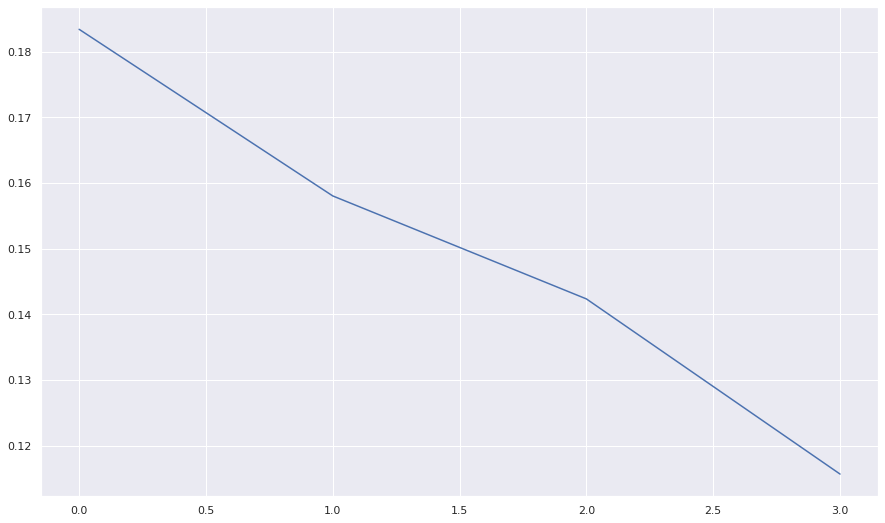

In [612]:
sns.lineplot(x=range(pca.n_components_), y = pca.explained_variance_ratio_)

In [606]:
X = kpca.transform(X)

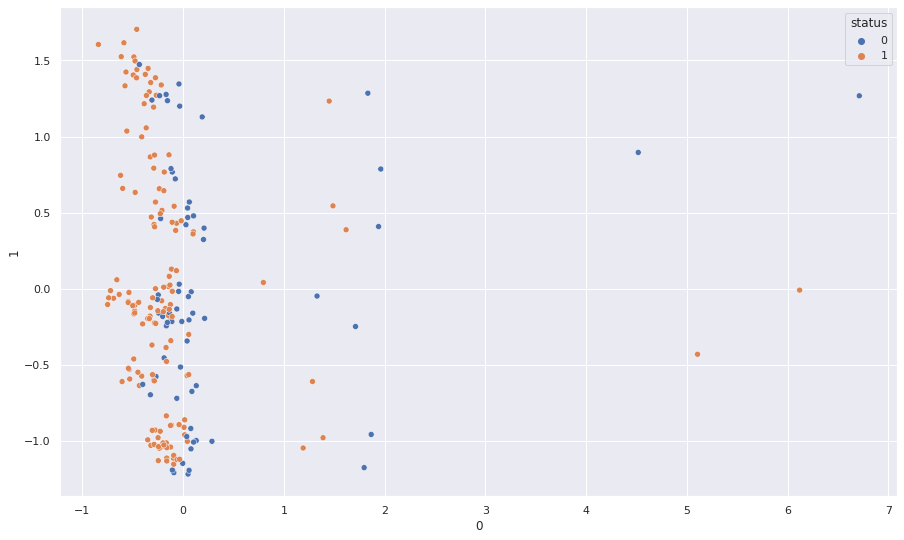

In [585]:
sns.scatterplot(x=X[0], y=X[1], hue=df["status"])

###### ***Random Forest***

In [536]:
X

array([[ 1.40874467e+00, -1.89458891e-01],
       [ 2.28428034e+00,  9.31637351e-01],
       [-2.33960155e+00, -6.58103449e-01],
       [ 1.27677984e-01, -4.31495515e+00],
       [-2.25298701e+00,  1.46663049e+00],
       [ 2.81393952e+00, -1.02759604e+00],
       [-2.65622812e-01,  1.34924833e+00],
       [ 7.21528431e-01, -1.13298310e+00],
       [-2.40660208e+00,  1.42290381e+00],
       [-3.06934138e+00, -4.37102002e-01],
       [-2.58776119e+00, -1.49636742e+00],
       [-2.26246930e+00,  1.13546778e+00],
       [-7.19803023e-02, -1.98265306e+00],
       [-2.65546898e+00,  1.23622153e+00],
       [-2.77957994e+00, -2.41862356e+00],
       [-2.58697802e+00,  1.12409277e+00],
       [-2.56004944e+00,  4.11737023e-01],
       [-2.88430847e+00,  1.90135448e-01],
       [-2.65644573e+00, -1.06903838e+00],
       [ 7.82522781e-01,  1.64568458e+00],
       [-2.16214471e-02,  1.55325684e-02],
       [ 5.91603977e-01,  3.94706651e+00],
       [ 3.27276250e+00, -1.14847088e+00],
       [ 3.

In [584]:
X = pd.DataFrame(X)

In [586]:
randomforestclassifier = RandomForestClassifier()

In [587]:
gridsearchcv = GridSearchCV(randomforestclassifier, {"n_estimators": [10, 100 , 200], "n_jobs": [None, -1, 1]}, cv=10)

In [588]:
gridsearchcv = gridsearchcv.fit(X, y)

In [589]:
gridsearchcv.best_score_

0.7625541125541125

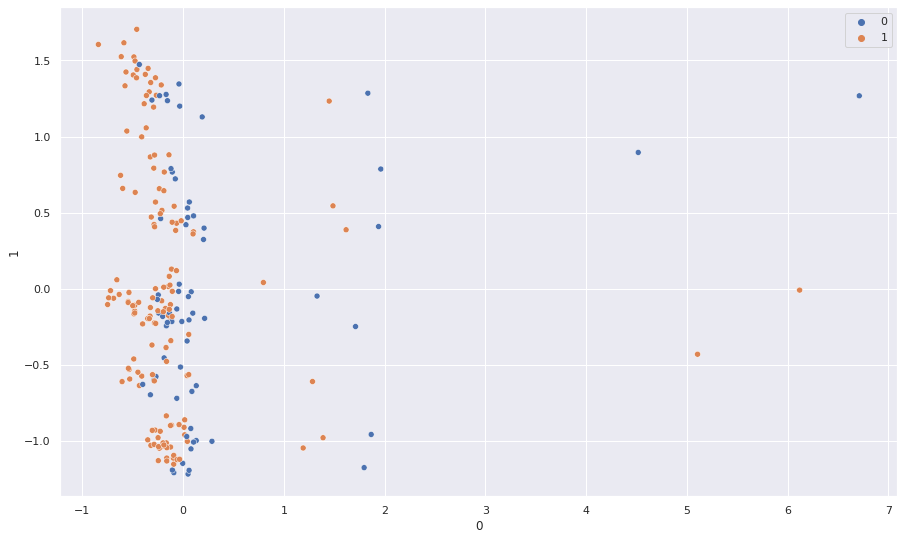

In [590]:
sns.scatterplot(x=X[0], y=X[1], hue=gridsearchcv.predict(X))

###### ***Bagging***

In [591]:
logistic = LogisticRegression()

In [592]:
bagging = BaggingClassifier(base_estimator=logistic, random_state=0)

In [593]:
gridsearchcv = GridSearchCV(bagging, {"n_estimators": [10, 15,20], "n_jobs": [None, 1, -1]}, cv=5)

In [594]:
gridsearchcv = gridsearchcv.fit(X, y)

In [595]:
gridsearchcv.best_score_

0.7023255813953487

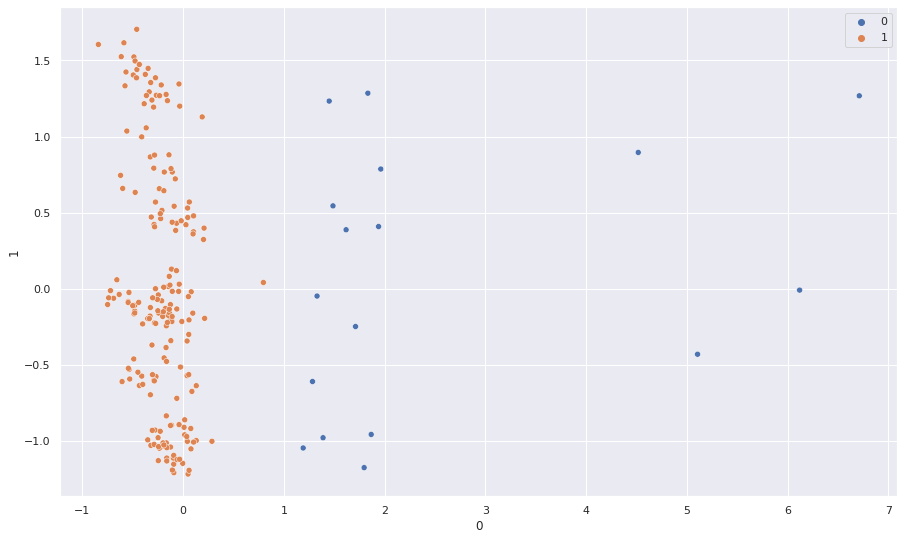

In [596]:
sns.scatterplot(x=X[0], y=X[1], hue=gridsearchcv.predict(X))

###### ***Boosting***

In [607]:
X

array([[-2.88346040e-01,  4.22049290e-01],
       [-5.58476265e-01,  1.03603479e+00],
       [ 1.19184027e+00, -1.04628603e+00],
       [ 2.02672503e-01,  3.23515088e-01],
       [-3.50743267e-01, -9.92823966e-01],
       [-1.55199192e-01,  1.23533207e+00],
       [-1.65896570e-01, -2.43637920e-01],
       [-2.09893811e-01,  5.14772647e-01],
       [-3.19739758e-01, -1.02925020e+00],
       [-9.18399665e-02, -1.20846944e+00],
       [ 9.48683690e-03, -9.10396095e-01],
       [-2.77816079e-01, -9.28626768e-01],
       [ 8.04967257e-02, -2.02527935e-02],
       [-9.63982111e-02, -1.11253838e+00],
       [ 1.30269196e-01, -9.97334200e-01],
       [-1.24580998e-01, -1.04002301e+00],
       [-1.67000853e-01, -1.01272307e+00],
       [-3.50482266e-03, -1.14710247e+00],
       [ 7.66863073e-02, -9.18257591e-01],
       [ 7.96984859e-01,  4.10712174e-02],
       [-2.03883822e-01, -1.68334179e-01],
       [-6.89942597e-01, -6.23894563e-02],
       [-2.16858477e-01,  1.33884047e+00],
       [-3.

In [598]:
gradientboostingclassifier = GradientBoostingClassifier()

In [599]:
gridsearchcv = GridSearchCV(gradientboostingclassifier, {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 1]}, cv=5)

In [600]:
gridsearchcv = gridsearchcv.fit(X, y)

In [601]:
gridsearchcv.best_score_

0.7627906976744186

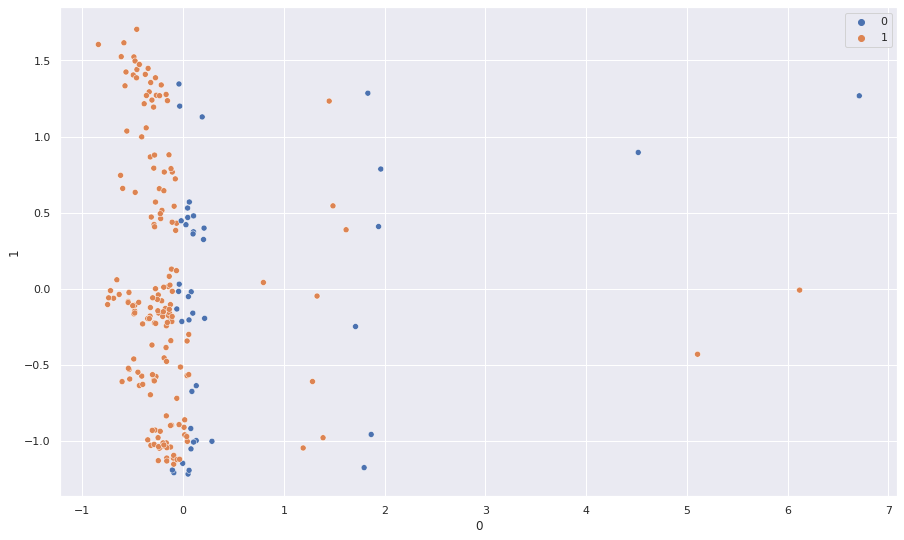

In [602]:
sns.scatterplot(x=X[0], y=X[1], hue=gridsearchcv.predict(X))